In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

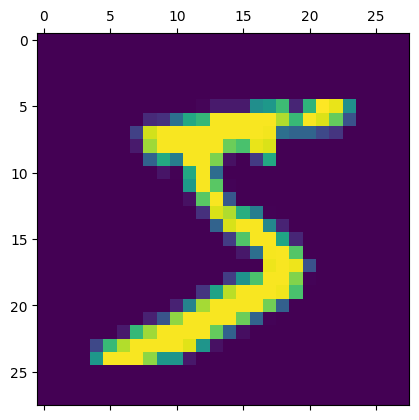

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4732 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2673 - accuracy: 0.9259


[0.26732587814331055, 0.9258999824523926]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.9374380e-02, 4.3521396e-07, 5.3788770e-02, 9.7075242e-01,
       2.1442836e-03, 9.7729377e-02, 2.0438024e-06, 9.9988806e-01,
       1.1523841e-01, 6.0354042e-01], dtype=float32)

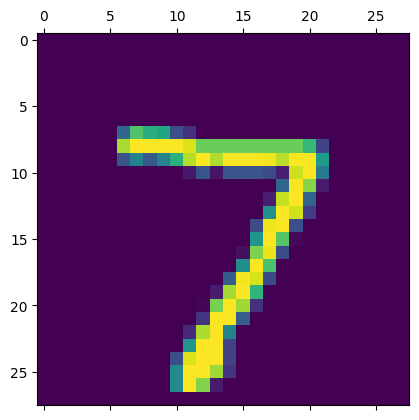

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])
#np.argmax finds a maximum element from an array and returns the index of it

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    6,    6,    3,    4,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,   10,  924,   19,    9,    3,   11,   11,   40,    2],
       [   1,    0,   20,  927,    0,   19,    2,   12,   23,    6],
       [   1,    1,    4,    2,  920,    0,   10,    5,   11,   28],
       [   6,    3,    4,   40,    8,  768,    9,    8,   40,    6],
       [   9,    3,    6,    2,    7,   16,  910,    2,    3,    0],
       [   1,    5,   20,    8,    3,    0,    0,  967,    6,   18],
       [   4,   12,    6,   19,    9,   20,    7,   13,  881,    3],
       [   9,    7,    1,   11,   32,    5,    0,   43,   14,  887]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

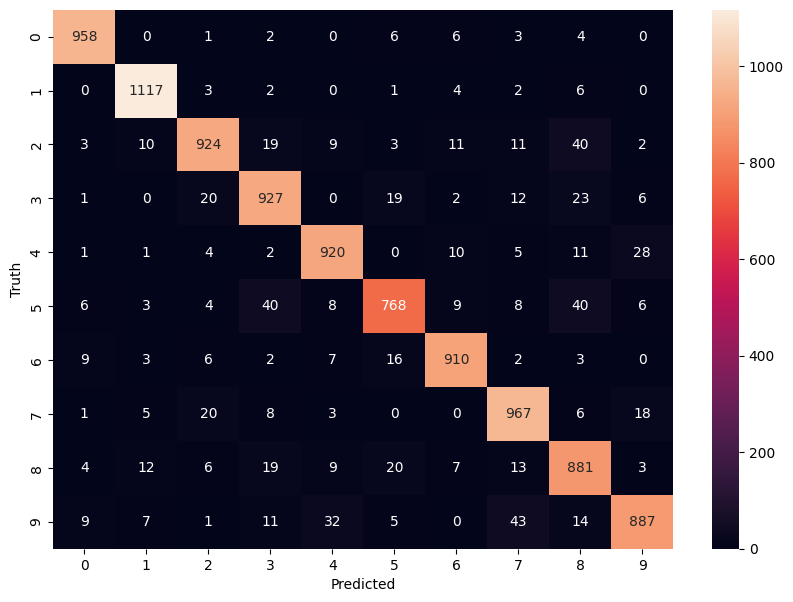

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2743 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1247 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0659 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.9837


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0729 - accuracy: 0.9772


[0.07288472354412079, 0.9771999716758728]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

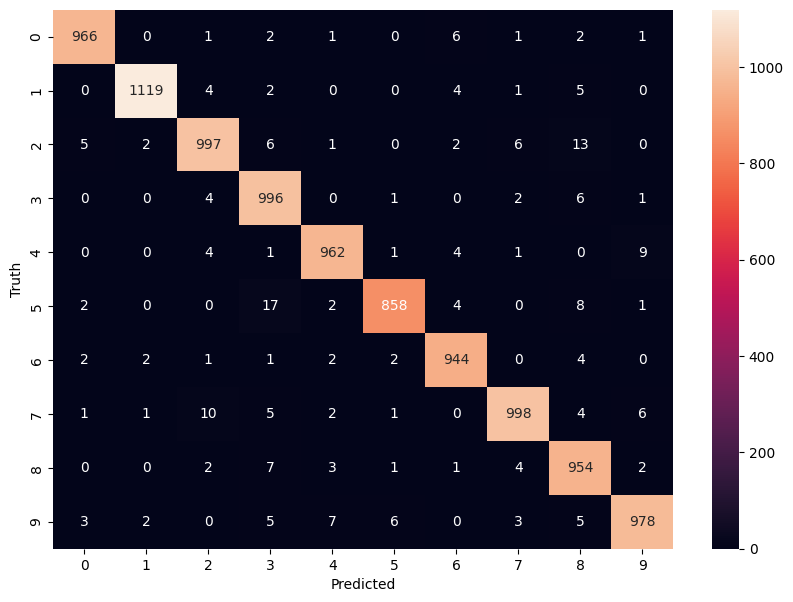

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
#Using Flatten layer so that we don't have to call .reshape on input dataset

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2810 - accuracy: 0.9200
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1262 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.018

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9755


[0.08387503027915955, 0.9754999876022339]